/tmp/ipython-input-3625473636.py:29: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Dataset Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



--- KNN Performance ---
Accuracy: 0.8634146341463415
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       100
           1       0.87      0.86      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



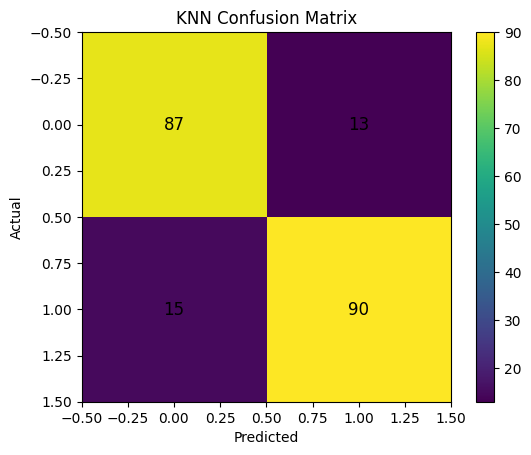

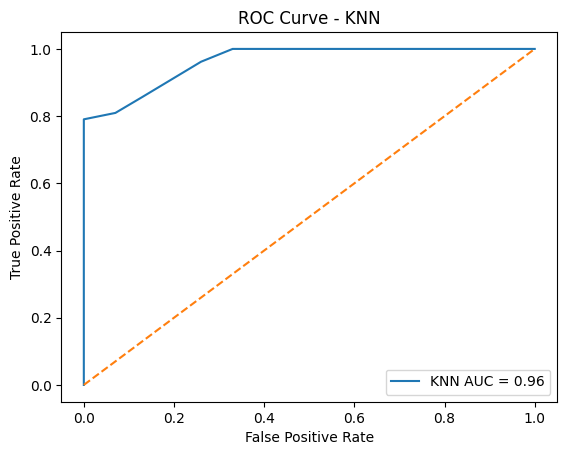

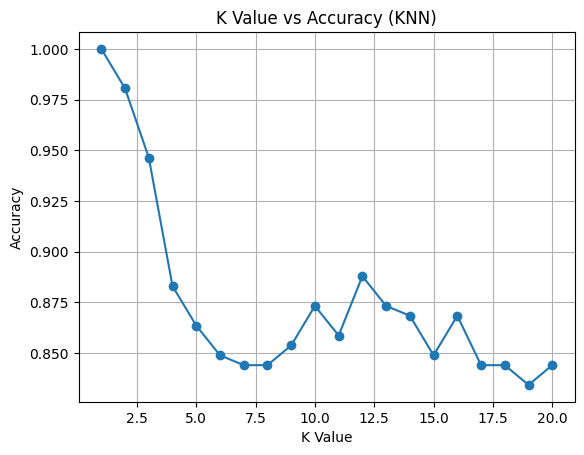

In [ ]:
# ==============================
# EXPERIMENT 4
# KNN - Heart Disease Dataset
# ==============================

!pip install kagglehub -q

import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

# --------------------------
# Load Dataset (SAME AS EXP 3)
# --------------------------
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "johnsmith88/heart-disease-dataset",
    "heart.csv"
)

print("Dataset Shape:", df.shape)
display(df.head())

# --------------------------
# Feature & Target Split
# --------------------------
X = df.drop("target", axis=1)
y = df["target"]

# --------------------------
# Train-Test Split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# --------------------------
# Feature Scaling
# --------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================
# KNN Classifier
# ==========================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_preds = knn.predict(X_test_scaled)
knn_probs = knn.predict_proba(X_test_scaled)[:, 1]

print("\n--- KNN Performance ---")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print(classification_report(y_test, knn_preds))

# ==========================
# Confusion Matrix (WITH NUMBERS)
# ==========================
cm = confusion_matrix(y_test, knn_preds)

plt.figure()
plt.imshow(cm)
plt.title("KNN Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center", fontsize=12)

plt.show()

# ==========================
# ROC Curve
# ==========================
fpr, tpr, _ = roc_curve(y_test, knn_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"KNN AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()

# ==========================
# K Value vs Accuracy
# ==========================
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, model.predict(X_test_scaled))
    accuracies.append(acc)

plt.figure()
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("K Value vs Accuracy (KNN)")
plt.grid(True)
plt.show()
